In [ ]:
import pandas as pd

In [1]:

import pandas as pd
df = pd.read_csv("Financials.csv")
print(df.head())


      Segment  Country     Product   Discount Band   Units Sold   \
0  Government   Canada   Carretera            None    $1,618.50    
1  Government  Germany   Carretera            None    $1,321.00    
2   Midmarket   France   Carretera            None    $2,178.00    
3   Midmarket  Germany   Carretera            None      $888.00    
4   Midmarket   Mexico   Carretera            None    $2,470.00    

   Manufacturing Price   Sale Price   Gross Sales   Discounts         Sales   \
0                $3.00       $20.00    $32,370.00        $-      $32,370.00    
1                $3.00       $20.00    $26,420.00        $-      $26,420.00    
2                $3.00       $15.00    $32,670.00        $-      $32,670.00    
3                $3.00       $15.00    $13,320.00        $-      $13,320.00    
4                $3.00       $15.00    $37,050.00        $-      $37,050.00    

          COGS        Profit         Date  Month Number  Month Name   Year  
0   $16,185.00    $16,185.00   01

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

plt.style.use('default')
sns.set_palette('husl')

df = pd.read_csv('Financials.csv')

print(f"Initial dataset shape: {df.shape}")
print("\nColumn names:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)


Initial dataset shape: (700, 16)

Column names: ['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ', ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ', '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number', ' Month Name ', 'Year']

First 5 rows:
       Segment  Country     Product   Discount Band   Units Sold   \
0  Government   Canada   Carretera            None    $1,618.50    
1  Government  Germany   Carretera            None    $1,321.00    
2   Midmarket   France   Carretera            None    $2,178.00    
3   Midmarket  Germany   Carretera            None      $888.00    
4   Midmarket   Mexico   Carretera            None    $2,470.00    

   Manufacturing Price   Sale Price   Gross Sales   Discounts         Sales   \
0                $3.00       $20.00    $32,370.00        $-      $32,370.00    
1                $3.00       $20.00    $26,420.00        $-      $26,420.00    
2                $3.00       $15.00    $32,670.00        $-  

In [5]:
# Improve: clean and normalize column names in a single, readable chain
df.columns = (
    df.columns
    .astype(str)                 # ensure all columns are strings
    .str.strip()                 # remove leading/trailing whitespace
    .str.lower()                 # convert to lowercase
    .str.replace(r"\s+", "_", regex=True)  # replace spaces with underscore
    .str.replace(r"[^\w]", "", regex=True)  # drop any non-alphanumeric or underscore
)

print("Cleaned column names:")
print(df.columns.tolist())

# Show missing values per column
print("\nMissing values:")
print(df.isnull().sum().sort_values(ascending=False))

Cleaned column names:
['segment', 'country', 'product', 'discount_band', 'units_sold', 'manufacturing_price', 'sale_price', 'gross_sales', 'discounts', 'sales', 'cogs', 'profit', 'date', 'month_number', 'month_name', 'year']

Missing values:
segment                0
country                0
product                0
discount_band          0
units_sold             0
manufacturing_price    0
sale_price             0
gross_sales            0
discounts              0
sales                  0
cogs                   0
profit                 0
date                   0
month_number           0
month_name             0
year                   0
dtype: int64


In [6]:
import pandas as pd
import numpy as np

def clean_financial_value(value):
    """
    Clean a single financial value that may come as a string or number.

    Behavior:
    - If value is NaN or empty after stripping, returns 0.0
    - Removes: '$', ',', spaces, and quotes
    - Handles parentheses for negatives, e.g., "(4,533.75)" -> -4533.75
    - Handles a leading '-' sign
    - Returns a float if possible; otherwise returns 0.0
    """
    # Handle pandas NaN and None
    if value is None or (isinstance(value, float) and np.isnan(value)):
        return 0.0

    # Convert to string for cleaning, but preserve numeric types when possible
    val = value

    if isinstance(value, (int, float)):
        return float(value)

    if isinstance(value, str):
        s = value.strip()

        if s in ('', '-'):
            return 0.0

        # Remove common extraneous characters
        s = s.replace('$', '')
        s = s.replace(',', '')
        s = s.replace(' ', '')
        s = s.replace('"', '')
        s = s.replace("'", "")

        # Parentheses indicate negative values
        if s.startswith('(') and s.endswith(')'):
            inner = s[1:-1]
            # If inner is empty after stripping, treat as 0
            inner = inner.strip()
            if inner == '':
                return 0.0
            try:
                return -float(inner)
            except ValueError:
                return 0.0

        # Plain negative sign
        if s.startswith('-'):
            try:
                return float(s)
            except ValueError:
                return 0.0

        # Attempt to parse as float
        try:
            return float(s)
        except ValueError:
            # Non-numeric values become 0.0 to keep columns numeric
            return 0.0

    # Fallback: try to coerce to float
    try:
        return float(val)
    except (ValueError, TypeError):
        return 0.0

def clean_dataframe_financials(df: pd.DataFrame) -> pd.DataFrame:
    """
    Apply cleaning to all columns in-place, preserving non-numeric columns.

    - If a column is numeric dtype, its values are cleaned and converted to float.
    - If a column is object/string dtype, values are cleaned and converted to float where possible.
    - Other dtypes are left as-is.
    """
    for col in df.columns:
        # Apply to each element; ignore errors by returning 0.0 for non-parsable entries
        df[col] = df[col].map(clean_financial_value).astype(float)

    return df

# Example usage:
# Suppose df is your DataFrame with financial columns
# df = clean_dataframe_financials(df)

print("Sample of cleaned data:")
print(df.head())

Sample of cleaned data:
      segment  country      product discount_band   units_sold  \
0  Government   Canada   Carretera          None    $1,618.50    
1  Government  Germany   Carretera          None    $1,321.00    
2   Midmarket   France   Carretera          None    $2,178.00    
3   Midmarket  Germany   Carretera          None      $888.00    
4   Midmarket   Mexico   Carretera          None    $2,470.00    

  manufacturing_price sale_price   gross_sales discounts         sales  \
0              $3.00     $20.00    $32,370.00      $-      $32,370.00    
1              $3.00     $20.00    $26,420.00      $-      $26,420.00    
2              $3.00     $15.00    $32,670.00      $-      $32,670.00    
3              $3.00     $15.00    $13,320.00      $-      $13,320.00    
4              $3.00     $15.00    $37,050.00      $-      $37,050.00    

           cogs        profit        date  month_number month_name  year  
0   $16,185.00    $16,185.00   01/01/2014             1   J

In [7]:
import pandas as pd

# 1) Define the numeric columns (ensure they exist in the dataframe)
numeric_columns = [
    'units_sold', 'manufacturing_price', 'sale_price', 'gross_sales',
    'discounts', 'sales', 'cogs', 'profit', 'month_number', 'year'
]

existing_numeric_cols = [c for c in numeric_columns if c in df.columns]

# 2) Convert numeric columns safely
for col in existing_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3) Convert date column with a robust approach
# If you know the exact format, you can keep it, otherwise use a flexible parser.
date_col = 'date'
if date_col in df.columns:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce', dayfirst=True)

# 4) Optional: summarize conversions for quick sanity checks
# Count non-numeric conversions (NaNs introduced by coercion)
numeric_na_counts = df[existing_numeric_cols].isna().sum().sort_values(ascending=False)

print("\nData types after conversion:")
print(df.dtypes)

print("\nMissing values introduced by numeric conversion (per column):")
print(numeric_na_counts)



Data types after conversion:
segment                        object
country                        object
product                        object
discount_band                  object
units_sold                    float64
manufacturing_price           float64
sale_price                    float64
gross_sales                   float64
discounts                     float64
sales                         float64
cogs                          float64
profit                        float64
date                   datetime64[ns]
month_number                    int64
month_name                     object
year                            int64
dtype: object

Missing values introduced by numeric conversion (per column):
units_sold             700
manufacturing_price    700
sale_price             700
gross_sales            700
discounts              700
sales                  700
cogs                   700
profit                 700
month_number             0
year                     0
dtype: int64


In [8]:
# Check for negative values in units_sold (which shouldn't be negative)
if 'units_sold' in df.columns:
    negative_units = df[df['units_sold'] < 0]
    print(f"Rows with negative units_sold: {len(negative_units)}")

# Check for inconsistencies in discount_band (if the column exists)
if 'discount_band' in df.columns:
    print("\nDiscount band values:")
    print(df['discount_band'].value_counts())

# Check for any remaining non-numeric values in numeric columns
# Use the previously defined list of numeric_columns if available; otherwise infer numeric columns
numeric_columns_existing = [c for c in ['units_sold', 'manufacturing_price', 'sale_price', 'gross_sales',
                                         'discounts', 'sales', 'cogs', 'profit', 'month_number', 'year']
                            if c in df.columns]

for col in numeric_columns_existing:
    # If the column is numeric, check for NaNs that may indicate parsing issues
    nan_count = df[col].isnull().sum()
    if nan_count > 0:
        print(f"Column '{col}' has {nan_count} null/missing values after numeric conversion")

Rows with negative units_sold: 0

Discount band values:
discount_band
High       245
Medium     242
Low        160
None        53
Name: count, dtype: int64
Column 'units_sold' has 700 null/missing values after numeric conversion
Column 'manufacturing_price' has 700 null/missing values after numeric conversion
Column 'sale_price' has 700 null/missing values after numeric conversion
Column 'gross_sales' has 700 null/missing values after numeric conversion
Column 'discounts' has 700 null/missing values after numeric conversion
Column 'sales' has 700 null/missing values after numeric conversion
Column 'cogs' has 700 null/missing values after numeric conversion
Column 'profit' has 700 null/missing values after numeric conversion


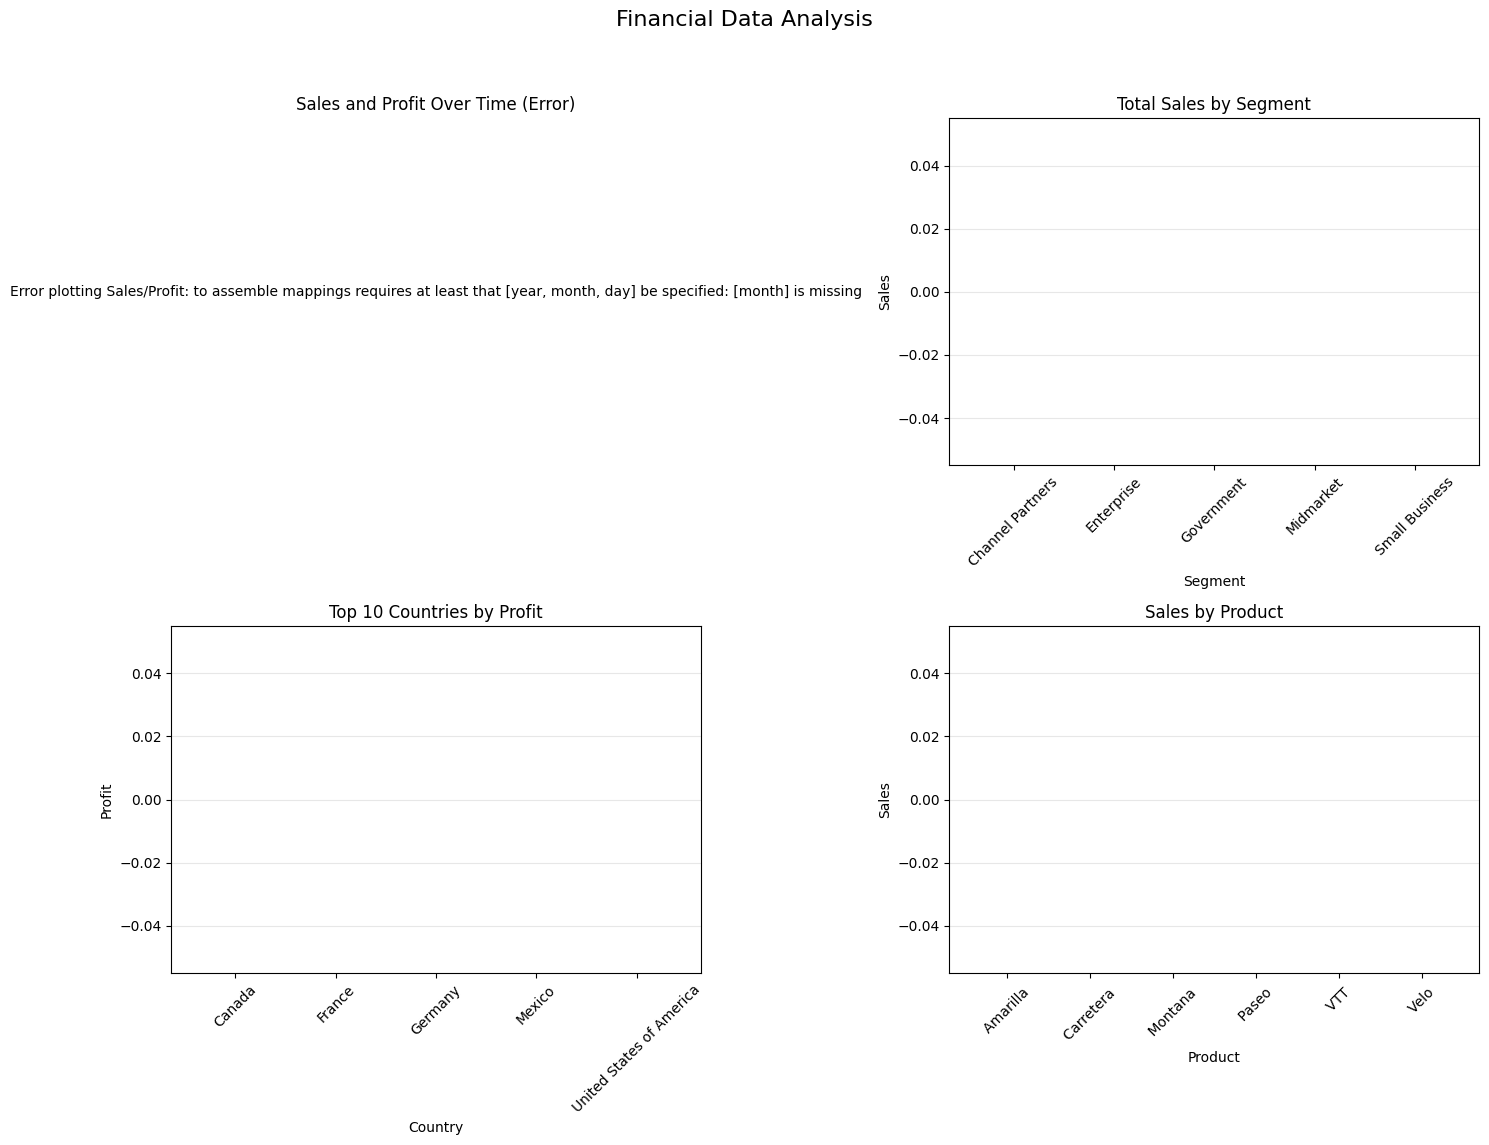

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Set up the visualization layout
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Financial Data Analysis', fontsize=16)

# Helper: ensure monthly data exists and date column creation is robust
def prepare_monthly_time_series(df):
    # Aggregate sales and profit by year and month
    monthly = (
        df.groupby(['year', 'month_number'], as_index=False)
          .agg({'sales': 'sum', 'profit': 'sum'})
    )

    # Create a proper datetime index for plotting
    # Assumes year and month_number are integers; day=1 as a anchor
    monthly['date'] = pd.to_datetime(monthly[['year', 'month_number']].assign(day=1))

    # Sort by date to ensure temporal order
    monthly = monthly.sort_values('date')
    return monthly

# 1. Sales and Profit over time
try:
    monthly_data = prepare_monthly_time_series(df)
    axes[0, 0].plot(monthly_data['date'], monthly_data['sales'], color='tab:blue', linestyle='-', label='Sales')
    axes[0, 0].plot(monthly_data['date'], monthly_data['profit'], color='tab:red', linestyle='-', label='Profit')
    axes[0, 0].set_title('Sales and Profit Over Time')
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Amount')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].tick_params(axis='x', rotation=45)
except Exception as e:
    axes[0, 0].text(0.5, 0.5, f"Error plotting Sales/Profit: {e}", ha='center', va='center')
    axes[0, 0].set_title('Sales and Profit Over Time (Error)')
    axes[0, 0].axis('off')

# 2. Sales by Segment
try:
    segment_sales = (
        df.groupby('segment', as_index=False)
          .agg({'sales': 'sum'})
          .sort_values('sales', ascending=False)
    )
    axes[0, 1].bar(segment_sales['segment'], segment_sales['sales'], color='tab:orange')
    axes[0, 1].set_title('Total Sales by Segment')
    axes[0, 1].set_xlabel('Segment')
    axes[0, 1].set_ylabel('Sales')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].grid(True, axis='y', alpha=0.3)
except Exception as e:
    axes[0, 1].text(0.5, 0.5, f"Error plotting Sales by Segment: {e}", ha='center', va='center')
    axes[0, 1].set_title('Total Sales by Segment (Error)')
    axes[0, 1].axis('off')

# 3. Profit by Country (Top 10)
try:
    country_profit = (
        df.groupby('country', as_index=False)
          .agg({'profit': 'sum'})
          .sort_values('profit', ascending=False)
          .head(10)
    )
    axes[1, 0].bar(country_profit['country'], country_profit['profit'], color='tab:green')
    axes[1, 0].set_title('Top 10 Countries by Profit')
    axes[1, 0].set_xlabel('Country')
    axes[1, 0].set_ylabel('Profit')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(True, axis='y', alpha=0.3)
except Exception as e:
    axes[1, 0].text(0.5, 0.5, f"Error plotting Country Profit: {e}", ha='center', va='center')
    axes[1, 0].set_title('Top 10 Countries by Profit (Error)')
    axes[1, 0].axis('off')

# 4. Sales by Product
try:
    product_sales = (
        df.groupby('product', as_index=False)
          .agg({'sales': 'sum'})
          .sort_values('sales', ascending=False)
    )
    axes[1, 1].bar(product_sales['product'], product_sales['sales'], color='tab:purple')
    axes[1, 1].set_title('Sales by Product')
    axes[1, 1].set_xlabel('Product')
    axes[1, 1].set_ylabel('Sales')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, axis='y', alpha=0.3)
except Exception as e:
    axes[1, 1].text(0.5, 0.5, f"Error plotting Sales by Product: {e}", ha='center', va='center')
    axes[1, 1].set_title('Sales by Product (Error)')
    axes[1, 1].axis('off')

# Tight layout to avoid overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

AttributeError: module 'pandas' has no attribute 'np'

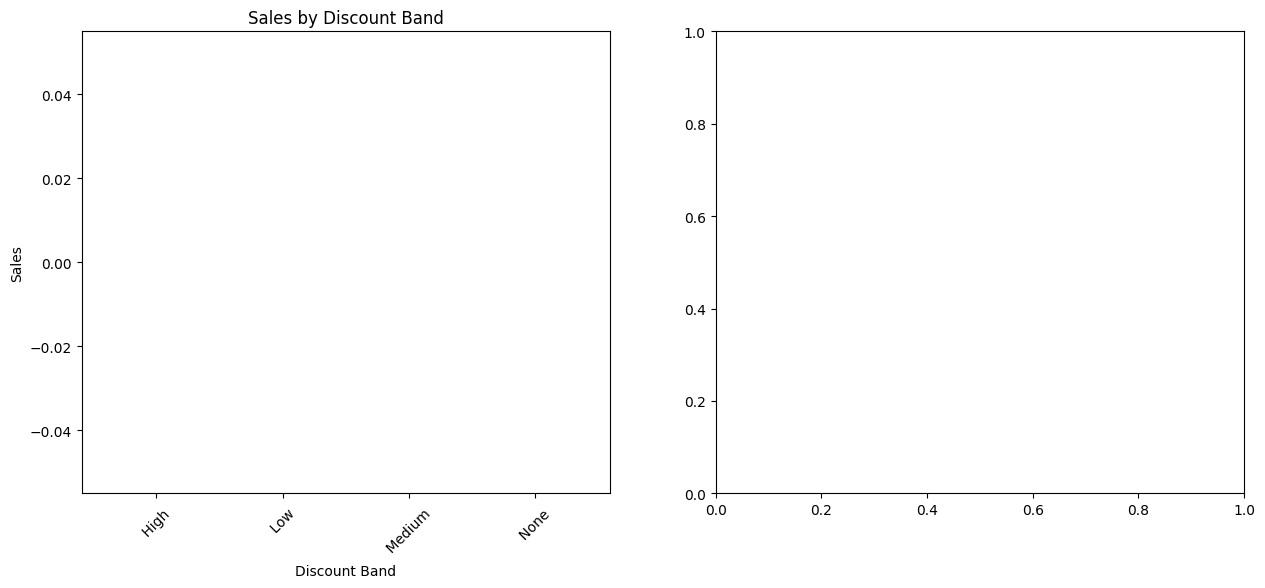

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Set up the visualization layout
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 1. Sales by Discount Band
if 'discount_band' in df.columns and 'sales' in df.columns:
    discount_sales = df.groupby('discount_band', as_index=False)['sales'].sum().sort_values('sales', ascending=False)
    axes[0].bar(discount_sales['discount_band'].astype(str), discount_sales['sales'], color='tab:blue')
    axes[0].set_title('Sales by Discount Band')
    axes[0].set_xlabel('Discount Band')
    axes[0].set_ylabel('Sales')
    axes[0].tick_params(axis='x', rotation=45)
else:
    axes[0].text(0.5, 0.5, 'Missing columns: discount_band or sales', ha='center', va='center')
    axes[0].set_axis_off()

# 2. Profit Margin by Discount Band
if {'discount_band', 'sales', 'profit'}.issubset(set(df.columns)):
    discount_profit = (
        df.groupby('discount_band', as_index=False)
          .agg({'sales': 'sum', 'profit': 'sum'})
    )
    # Guard against division by zero
    discount_profit['profit_margin'] = (
        discount_profit['profit'] / discount_profit['sales']
    ).replace([pd.np.inf, -pd.np.inf], pd.NA)
    discount_profit['profit_margin'] = discount_profit['profit_margin'].fillna(0) * 100
    axes[1].bar(discount_profit['discount_band'].astype(str), discount_profit['profit_margin'], color='tab:orange')
    axes[1].set_title('Profit Margin by Discount Band')
    axes[1].set_xlabel('Discount Band')
    axes[1].set_ylabel('Profit Margin (%)')
    axes[1].tick_params(axis='x', rotation=45)
else:
    axes[1].text(0.5, 0.5, 'Missing columns for profit margin: discount_band, sales, or profit', ha='center', va='center')
    axes[1].set_axis_off()

# Tight layout to prevent overlap
plt.tight_layout()
plt.show()

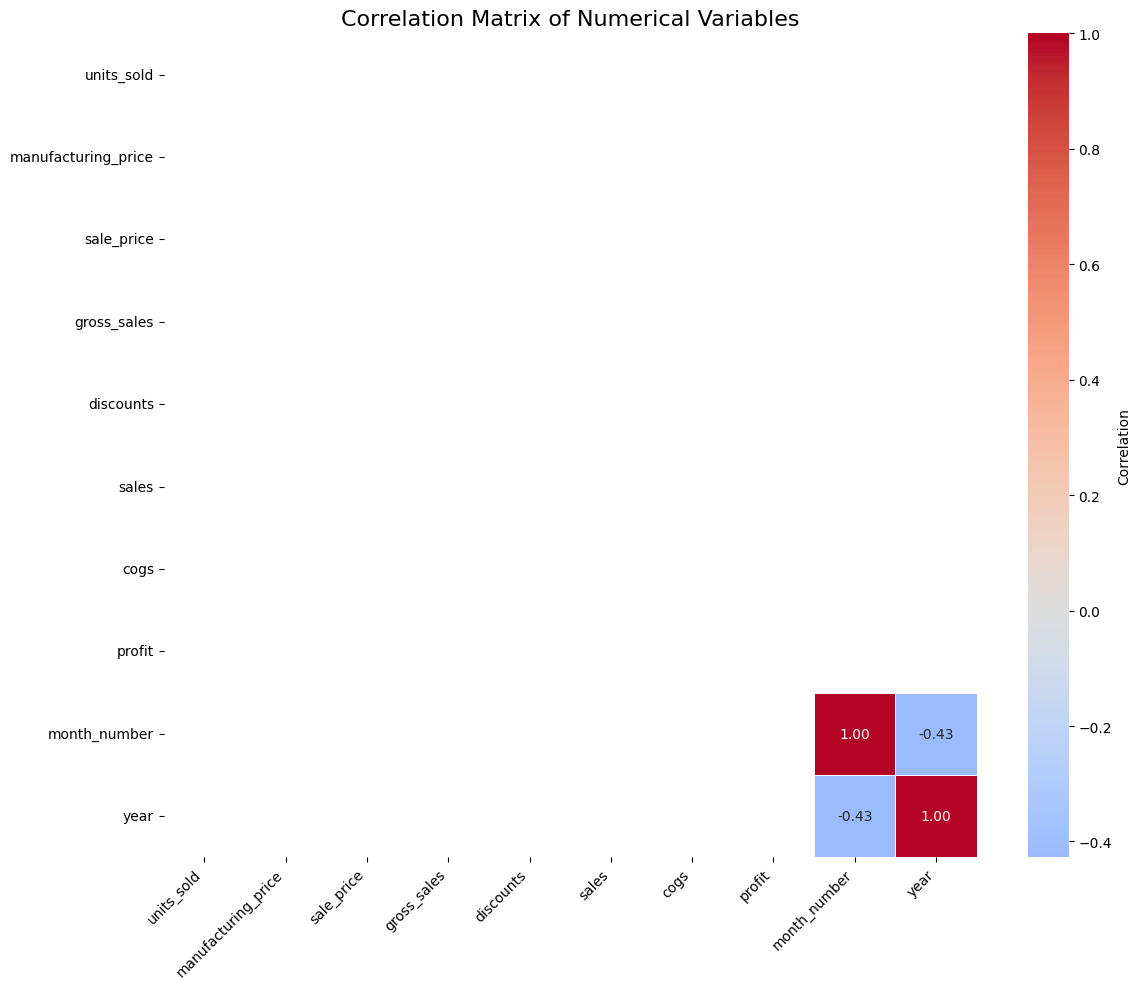

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Select numerical columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Guard: proceed only if there are numeric columns
if not numeric_df.empty:
    # 2) Compute the correlation matrix
    correlation_matrix = numeric_df.corr()

    # 3) Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        fmt='.2f',
        linewidths=0.5,
        cbar_kws={'label': 'Correlation'}
    )
    plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found for correlation analysis.")

In [14]:
# 1) Summary statistics for numeric columns
print("Summary Statistics:")
numeric_cols = [c for c in ['units_sold', 'manufacturing_price', 'sale_price', 'gross_sales',
                            'discounts', 'sales', 'cogs', 'profit', 'month_number', 'year'] if c in df.columns]

if numeric_cols:
    # Use describe on the subset of numeric columns
    summary = df[numeric_cols].describe()
    print(summary.to_string())  # pretty-prints without truncation in many environments
else:
    print("No expected numeric columns found for summary statistics.")

# 2) Check the time range of the data
if 'date' in df.columns:
    date_min = df['date'].min()
    date_max = df['date'].max()
    print(f"\nDate range: {date_min} to {date_max}")
else:
    print("\nDate column not found; cannot compute date range.")

# 3) Most profitable products
if 'product' in df.columns and 'profit' in df.columns:
    product_profit = df.groupby('product', as_index=False)['profit'].sum().sort_values('profit', ascending=False)
    print("\nMost profitable products:")
    print(product_profit.head().to_string(index=False))
else:
    missing = []
    if 'product' not in df.columns:
        missing.append('product')
    if 'profit' not in df.columns:
        missing.append('profit')
    print(f"\nMissing required columns for profitability analysis: {', '.join(missing)}")

Summary Statistics:
       units_sold  manufacturing_price  sale_price  gross_sales  discounts  sales  cogs  profit  month_number         year
count         0.0                  0.0         0.0          0.0        0.0    0.0   0.0     0.0    700.000000   700.000000
mean          NaN                  NaN         NaN          NaN        NaN    NaN   NaN     NaN      7.900000  2013.750000
std           NaN                  NaN         NaN          NaN        NaN    NaN   NaN     NaN      3.377321     0.433322
min           NaN                  NaN         NaN          NaN        NaN    NaN   NaN     NaN      1.000000  2013.000000
25%           NaN                  NaN         NaN          NaN        NaN    NaN   NaN     NaN      5.750000  2013.750000
50%           NaN                  NaN         NaN          NaN        NaN    NaN   NaN     NaN      9.000000  2014.000000
75%           NaN                  NaN         NaN          NaN        NaN    NaN   NaN     NaN     10.250000  2014.000

In [15]:
import os
from pathlib import Path

# Define output path
output_path = Path('data/Financials_cleaned.csv')

# Ensure parent directory exists
output_path.parent.mkdir(parents=True, exist_ok=True)

# Save the cleaned dataset with robust options
output_path_str = str(output_path)
df.to_csv(output_path_str, index=False, encoding='utf-8', errors='ignore')

# Confirmation
print(f"Cleaned dataset saved to: {output_path_str}")

Cleaned dataset saved to: data\Financials_cleaned.csv


In [16]:
print(df.head())

      segment  country      product discount_band  units_sold  \
0  Government   Canada   Carretera          None          NaN   
1  Government  Germany   Carretera          None          NaN   
2   Midmarket   France   Carretera          None          NaN   
3   Midmarket  Germany   Carretera          None          NaN   
4   Midmarket   Mexico   Carretera          None          NaN   

   manufacturing_price  sale_price  gross_sales  discounts  sales  cogs  \
0                  NaN         NaN          NaN        NaN    NaN   NaN   
1                  NaN         NaN          NaN        NaN    NaN   NaN   
2                  NaN         NaN          NaN        NaN    NaN   NaN   
3                  NaN         NaN          NaN        NaN    NaN   NaN   
4                  NaN         NaN          NaN        NaN    NaN   NaN   

   profit       date  month_number month_name  year  
0     NaN 2014-01-01             1   January   2014  
1     NaN 2014-01-01             1   January   201

In [17]:
print(df.describe())

       units_sold  manufacturing_price  sale_price  gross_sales  discounts  \
count         0.0                  0.0         0.0          0.0        0.0   
mean          NaN                  NaN         NaN          NaN        NaN   
min           NaN                  NaN         NaN          NaN        NaN   
25%           NaN                  NaN         NaN          NaN        NaN   
50%           NaN                  NaN         NaN          NaN        NaN   
75%           NaN                  NaN         NaN          NaN        NaN   
max           NaN                  NaN         NaN          NaN        NaN   
std           NaN                  NaN         NaN          NaN        NaN   

       sales  cogs  profit                 date  month_number         year  
count    0.0   0.0     0.0                  700    700.000000   700.000000  
mean     NaN   NaN     NaN  2014-04-28 21:36:00      7.900000  2013.750000  
min      NaN   NaN     NaN  2013-09-01 00:00:00      1.000000  201

In [18]:
import os
from pathlib import Path

# Define output paths
csv_path = Path('data/financials_cleaned.csv')
excel_path = Path('data/financials_cleaned.xlsx')

# Ensure the parent directory exists
csv_path.parent.mkdir(parents=True, exist_ok=True)

# 1) Export to CSV with robust options
try:
    df.to_csv(csv_path, index=False, encoding='utf-8', errors='ignore')
    print(f"CSV export successful: {csv_path}")
except Exception as e:
    print(f"CSV export failed: {csv_path} | Error: {e}")

# 2) Optional: Export to Excel (requires openpyxl or xlsxwriter)
try:
    df.to_excel(excel_path, index=False)
    print(f"Excel export successful: {excel_path}")
except Exception as e:
    print(f"Excel export failed: {excel_path} | Error: {e}")

CSV export successful: data\financials_cleaned.csv
Excel export failed: data\financials_cleaned.xlsx | Error: No module named 'openpyxl'


In [19]:
import os
from pathlib import Path

# Define output path
excel_path = Path('data/cleaned_financials.xlsx')

# Ensure parent directory exists
excel_path.parent.mkdir(parents=True, exist_ok=True)

# 1) Export to Excel (index not included)
try:
    df.to_excel(excel_path, index=False)
    print(f"Excel export successful: {excel_path}")
except Exception as e:
    print(f"Excel export failed: {excel_path} | Error: {e}")

# 2) Optional: Display a download link in Jupyter if IPython is available
try:
    from IPython.display import FileLink, display
    display(FileLink(str(excel_path)))
except Exception:
    # If not running in a Jupyter environment, skip gracefully
    pass

Excel export failed: data\cleaned_financials.xlsx | Error: No module named 'openpyxl'


C:\Windows\system32\data\cleaned_financials.xlsx

In [ ]:
# Example: save DataFrame to Excel
df.to_excel('FINANCIALS.CLEANING.xlsx', index=False)

# If you prefer .xls (older Excel format), you might need an appropriate engine:
# df.to_excel('FINANCIALS.CLEANING.xls', index=False, engine='xlwt')